# Confusable Detector

Tutorial for using confusable detector.

## Setup

### Install required packages (run once)

In [1]:
! ./scripts/setup.sh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease 
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [993 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1292 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9282 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [87.8 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [866 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1403 kB]
Fetched 4904 kB in 2s (1980 kB/s)                          
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information

### Install fonts (run once)

In [2]:
! apt-get install -y fonts-noto-cjk-extra

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk
The following NEW packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 187 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk-extra all 1:20190409+repack1-0ubuntu0.18.04 [131 MB]
Fetched 187 MB in 22s (8639 kB/s)                                              
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 16538 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a

### List all available font names

In [3]:
! fc-list | grep Noto

/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK SC:style=Bold
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK TC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto Sans CJK HK,Noto Sans CJK HK Black:style=Black,Regular
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK JP:style=Bold
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc: Noto Serif CJK KR:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK JP:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK HK:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK KR:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto Sans CJK TC,Noto Sans CJK TC Black:style=Black,Regular
/usr/share/fonts/opentype/noto/NotoSerifCJK-Medium.ttc: Noto Serif CJK KR,Noto Serif CJK KR Medium:style=Medium,Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc: Noto 

In [4]:
from IPython.display import Image, display
from vis_gen import VisGen
from distance_metrics import Distance, ImgFormat

## Generate Visualizations

In [5]:
vg = VisGen()

### Properties (settings)

In [6]:
vg.font_name

'Noto Sans CJK SC'

In [7]:
vg.font_size # Default font size for chrome browser

16

In [8]:
vg.image_size # Leave enough margin for data augmentation

20

In [9]:
vg.out_dir

'img_out'

In [10]:
vg.grayscale

False

In [11]:
vg.font_style = "SemiBold"
vg.font_style

'SemiBold'

In [12]:
vg.antialias = 'Default'
vg.antialias

'Default'

### For the purpose of demonstration, we temporarily change the font size to 40

In [13]:
vg.image_size = 42
vg.font_size = 40

### Visualize single code point

In [14]:
vg.visualize_single('段')

'/tf/img_out/U+6bb5_Noto Sans CJK SC_SemiBold_Default.png'

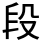

In [15]:
display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_SemiBold_Default.png'))

### Visualize range of code points

In [16]:
vg.visualize_range(start='\u4e05', end='\u4e09')

Visualizing 5 total code points from 丅 to 三.
Now writing 1st code point.
Finished.
Images stored in directory /tf/img_out.


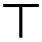

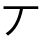

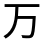

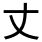

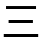

In [17]:
for i in range(ord('\u4e05'), ord('\u4e09')+1):
    display(Image(filename='img_out/U+'+ str(hex(i))[2:]+'_Noto Sans CJK SC_SemiBold_Default.png'))

### Options for generating dataset

In [18]:
# Visualize availble styles for Noto Sans CJK
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    vg.font_style = style
    vg.visualize_single('段')

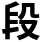

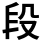

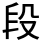

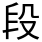

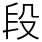

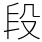

In [19]:
for style in ['Bold','Medium','Regular','DemiLight','Light','Thin']:
    display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_'+style+'_Default.png'))

In [20]:
# Visualize availble styles for Noto Sans CJK
vg.font_name = 'Noto Sans CJK SC'
vg.font_style = 'Regular'
for antialias in ['Default','Fast','Good','None']:
    vg.antialias = antialias
    vg.visualize_single('段')

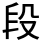

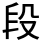

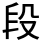

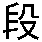

In [21]:
for antialias in ['Default','Fast','Good','None']:
    display(Image(filename='img_out/U+6bb5_Noto Sans CJK SC_Regular_'+antialias+'.png'))

## Generate Training Dataset

In [19]:
vg.image_size = 20
vg.font_size = 16
vg.out_dir = 'data/charset_1k'
for font_name in ['Noto Sans CJK SC', 'Noto Sans CJK JP','Noto Serif CJK TC', 'Noto Serif CJK KR']:
    vg.font_name = font_name
    vg.generate_dataset_from_file('source/charset_1k.txt', ['Bold','Medium','Regular','DemiLight','Light','Thin'],
                                  ['Default','None'])

/tf/charset_1k does not exist, creating directory...
New directory successfully created.
Successfully selected font style: Bold.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code 

Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style:

Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style: Thin.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 9

Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected antialiasing style: None.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code poi

Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 551st code point.
Now writing 601st code point.
Now writing 651st code point.
Now writing 701st code point.
Now writing 751st code point.
Now writing 801st code point.
Now writing 851st code point.
Now writing 901st code point.
Now writing 951st code point.
Finished.
Images stored in directory /tf/charset_1k.
Successfully selected font style: Light.
Successfully selected antialiasing style: Default.
Visualizing 1000 total code points.
Now writing 1st code point.
Now writing 51st code point.
Now writing 101st code point.
Now writing 151st code point.
Now writing 201st code point.
Now writing 251st code point.
Now writing 301st code point.
Now writing 351st code point.
Now writing 401st code point.
Now writing 451st code point.
Now writing 501st code point.
Now writing 

## Split training and testing dataset

In [3]:
vg.out_dir = 'data/charset_1k'
vg.train_test_split()

Creating train test split with 48000 total records...
Train size: 47900
Test size: 100
Train test split successfully created.
Training dataset has 1000 categories.
Test dataset has 97 categories.
All test categories in training data: True


(47900, 100)

The information printed out by `vg.train_test_split` is useful for creating TensorFlow dataset.

### Get TensorFlow dataset

## Distance Calculation

In [14]:
distance = Distance(img_format=ImgFormat.RGB)

### List all image formats

In [15]:
list(ImgFormat)

[<ImgFormat.RGB: 1>,
 <ImgFormat.A8: 2>,
 <ImgFormat.A1: 3>,
 <ImgFormat.EMBEDDINGS: 4>]

### Get supported distance metrics for RGB image

In [16]:
metrics = distance.get_metrics()
metrics.keys()

dict_keys(['manhattan', 'sum_squared', 'cross_correlation'])

### Calculate distance between two images

In [21]:
d = distance.calculate_from_path(metric=metrics['cross_correlation'], 
                                 path1='img_out/19973_Noto Sans CJK HK_SemiBold_None.png', 
                                 path2='img_out/19974_Noto Sans CJK HK_SemiBold_None.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19974), d))

Distance between 丅 and 丆 is 0.13945375382900238


In [22]:
d = distance.calculate_from_path(metric=metrics['cross_correlation'], 
                                 path1='img_out/19973_Noto Sans CJK HK_SemiBold_None.png', 
                                 path2='img_out/19976_Noto Sans CJK HK_SemiBold_None.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19976), d))

Distance between 丅 and 丈 is 0.29181215167045593
